# I - Exploratory data analysis

## 1 - Data collection

In [1]:
import sys
print(sys.executable)

/home/ayoub/projects/BostonHousingPricePredictionModel/ml/.venv/bin/python


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
data = pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.shape

(5000, 7)

## 2 - Data preprocessing

### a - Data understanding and quality assessement

In [52]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


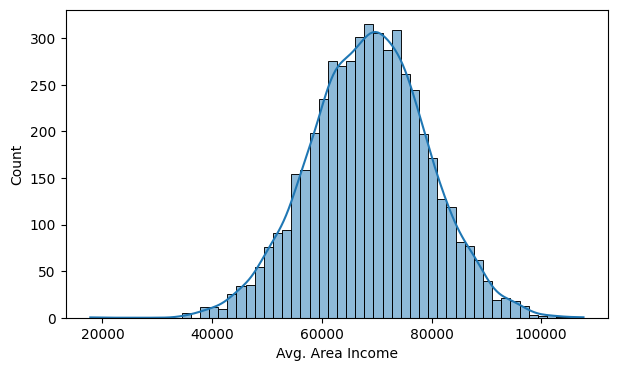

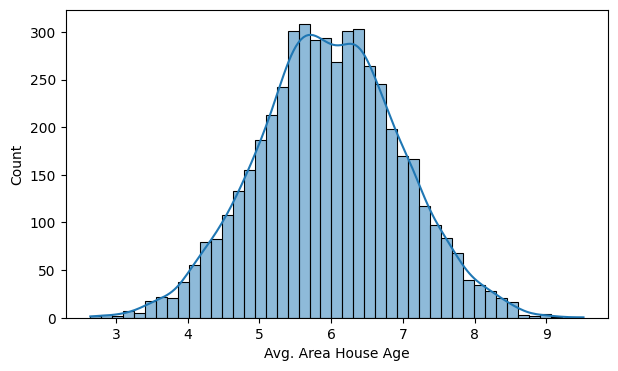

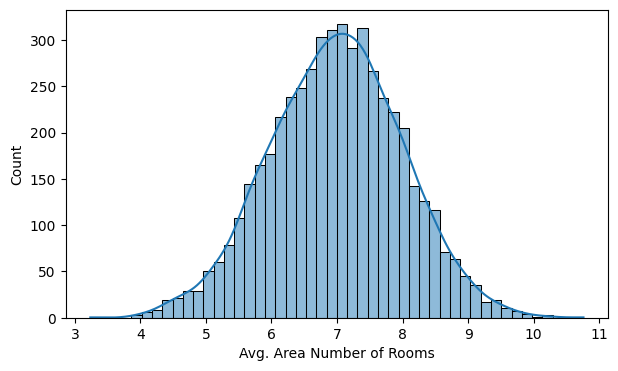

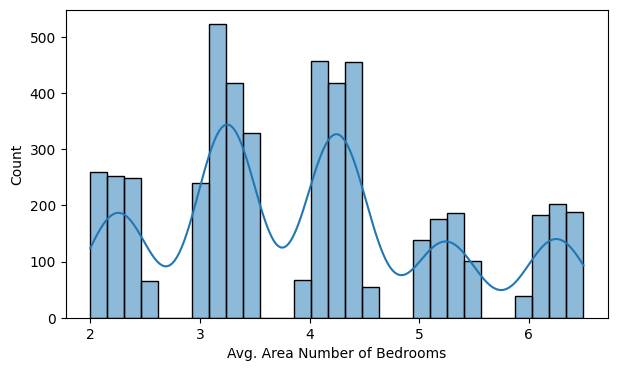

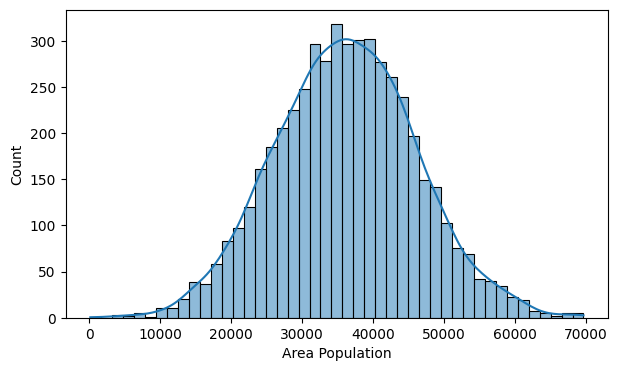

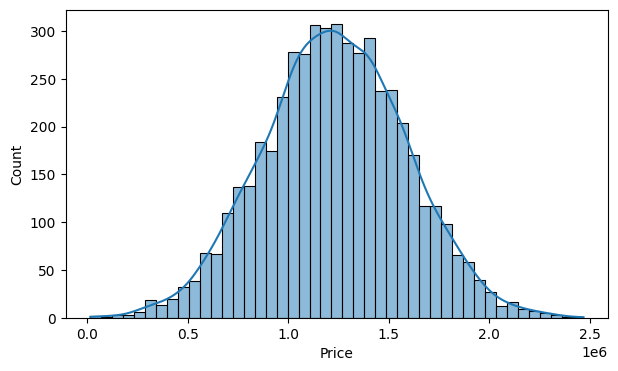

In [59]:
for col in data.columns[:-1]:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=data, x=col, kde=True)
    plt.show()

### b - Detection and handling of duplicates

In [36]:
print(data.duplicated().sum())

0


# c - Detection and handling of missing values

In [37]:
print(data.isna().sum())

Unnamed: 0                      0
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           5000 non-null   float64
 3   Avg. Area Number of Rooms     5000 non-null   float64
 4   Avg. Area Number of Bedrooms  5000 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 273.6 KB


## 3 - Features Engineering

### a - Feature Selection

In [60]:
data = pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [40]:
"""import seaborn as sns
import matplotlib.pyplot as plt

for col in data.columns[:-1]:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=data, x=col)
    plt.show()
"""

'import seaborn as sns\nimport matplotlib.pyplot as plt\n\nfor col in data.columns[:-1]:\n    plt.figure(figsize=(8,5))\n    sns.boxplot(data=data, x=col)\n    plt.show()\n'

In [61]:
catagory_column = data.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_column = data.select_dtypes(include=['number']).columns.tolist()
print('Category Column:', catagory_column)
print('Numerical Column:', numeric_column)

Category Column: ['Address']
Numerical Column: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


### b - Feature Transformation

In [6]:
encoder = LabelEncoder()
data['Address'] = encoder.fit_transform(data['Address'])
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,962
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,863
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,4069
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,4794
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,4736


### d - Feature Selection

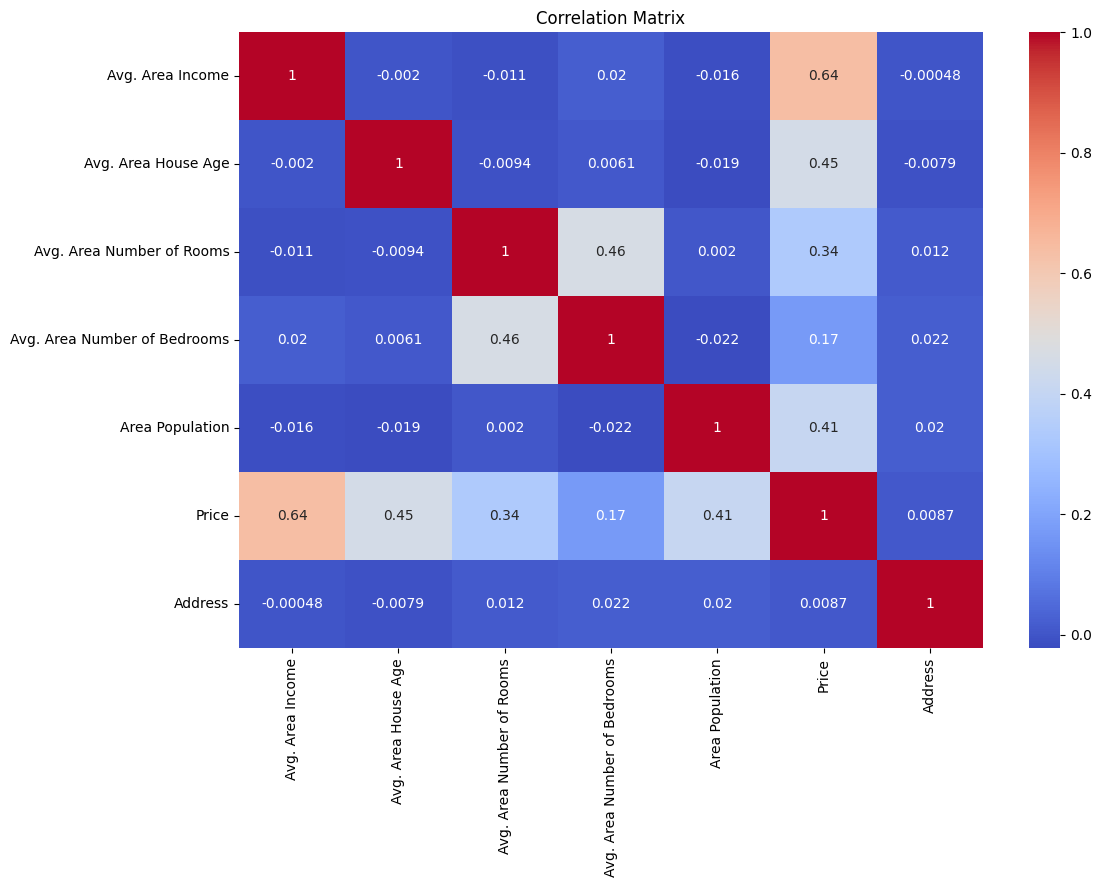

In [8]:
correlation_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [9]:
data.drop(columns=['Address'], inplace=True)
print(data.columns.tolist())

['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


In [10]:
data.to_csv('USA_Housing_cleaned.csv', index=False)

### b - Feature Scaling

In [11]:
data = pd.read_csv('USA_Housing_cleaned.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [12]:
exclude_cols = ['Price']

cols_to_normalize = [col for col in data.columns if col not in exclude_cols]

scaler = StandardScaler()

data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,1.059034e+06
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,1.505891e+06
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,1.058988e+06
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,1.260617e+06
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,6.309435e+05


In [13]:
joblib.dump(scaler,'../artifacts/scaler.pkl')

['../artifacts/scaler.pkl']

In [14]:
data.to_csv('data_cleaned.csv', index=False)